<a href="https://colab.research.google.com/github/hasanocal7/DS-Libs/blob/main/MatPlotLib_SeaBorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [101]:
plt.rcParams["figure.figsize"] = (10, 6)

plt.rcParams["axes.labelsize"] = 16

In [102]:
data = sns.load_dataset("penguins")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


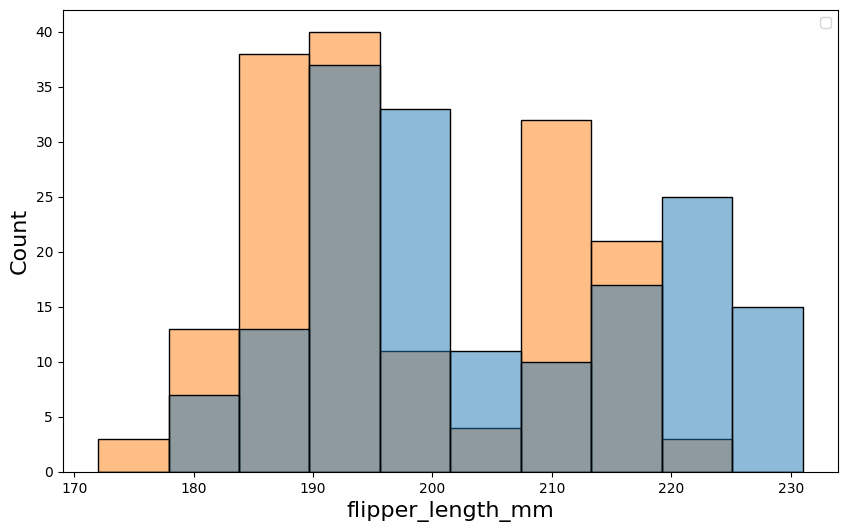

In [103]:
sns.histplot(data, x = "flipper_length_mm", hue = "sex", color = "pink")

plt.legend()
plt.show()

In [104]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Seaborn ile Scatterplot

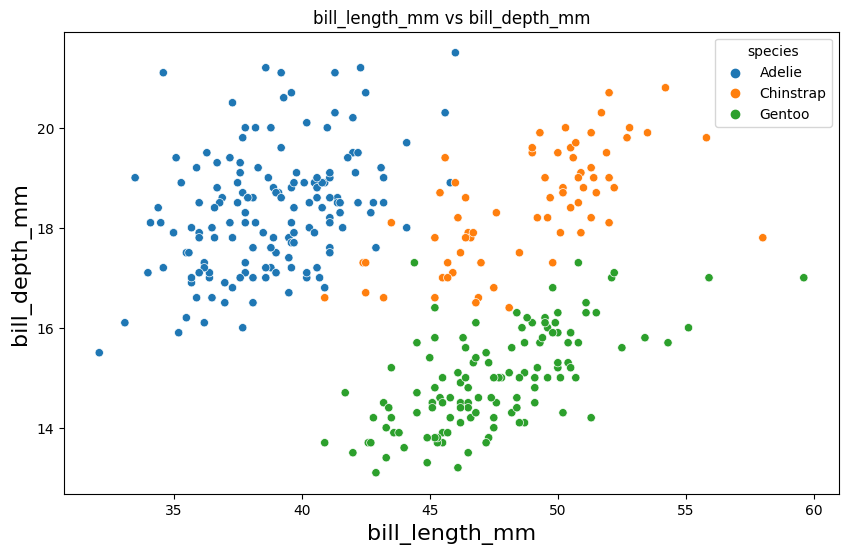

In [105]:
sns.scatterplot(
    data,
    x = "bill_length_mm",
    y ="bill_depth_mm",
    hue = "species"
)

plt.title("bill_length_mm vs bill_depth_mm")
plt.show()

# Seaborn ile Barplot

In [106]:
grouped_data = data.groupby(["species", "sex"])["body_mass_g"].mean().reset_index()
grouped_data

,species,sex,body_mass_g
0,Adelie,Female,3368.835616
1,Adelie,Male,4043.493151
2,Chinstrap,Female,3527.205882
3,Chinstrap,Male,3938.970588
4,Gentoo,Female,4679.741379
5,Gentoo,Male,5484.836066


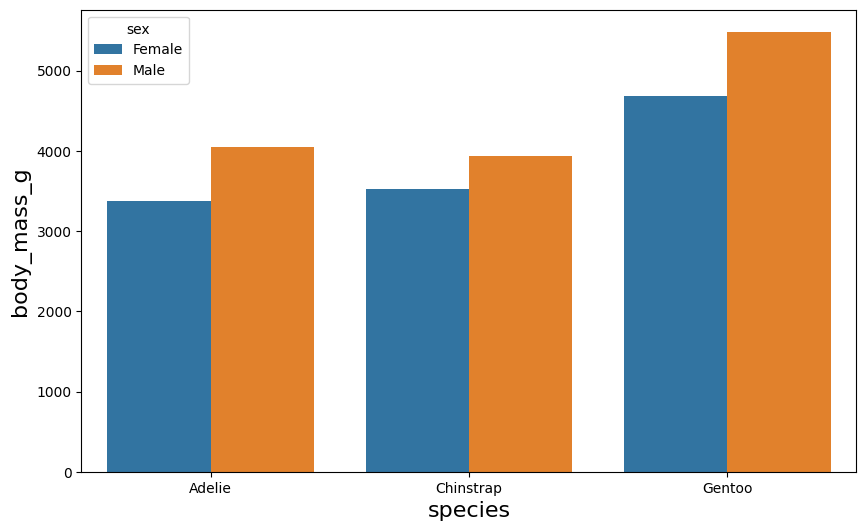

In [107]:
sns.barplot(grouped_data,
            x = "species",
            y = "body_mass_g",
            hue = "sex")

plt.show()

# plt.subplots()

# Soru : Türlerin (species), boddy_mass_g özelliğine bakarak bir boxplot çiziniz ve subplot içine ekleyiniz.

x = species, y = body_mass_g 

# Soru: sütununu bir histogram olarak subplot içine plot ediniz. species e göre ayrılsın.

hue =...

Text(0.5, 1.0, 'Spicies and Body Mass G')

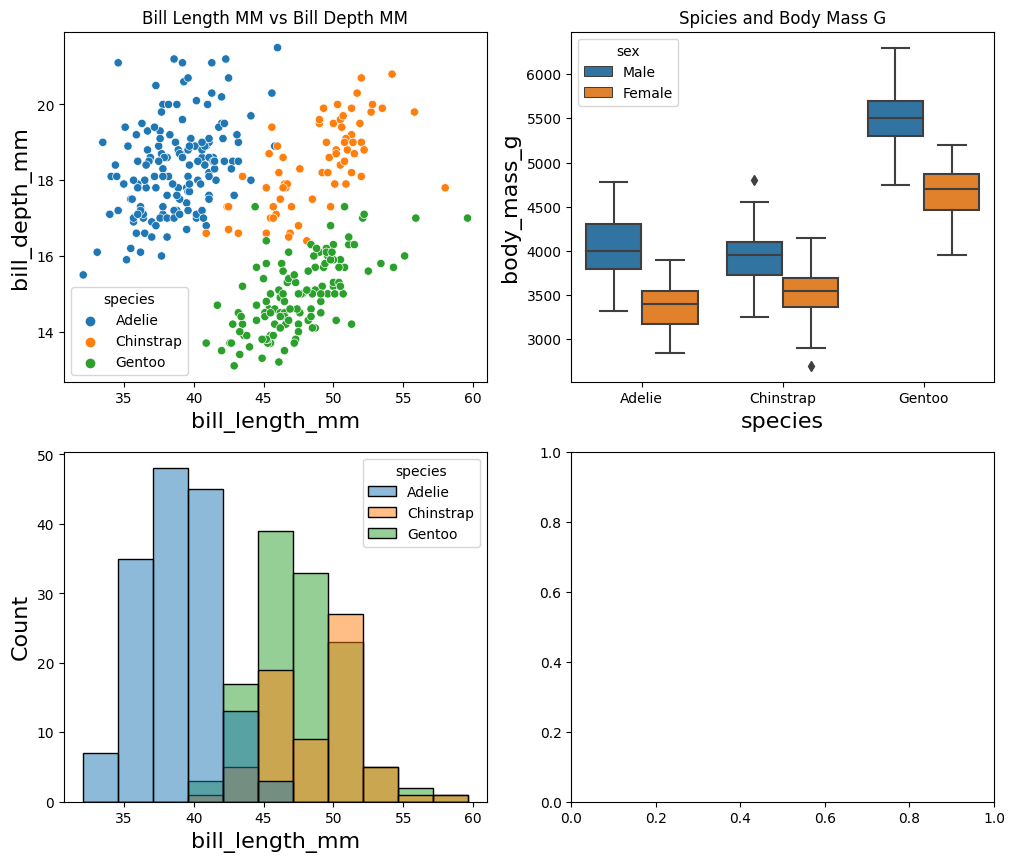

In [108]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.scatterplot(
    data,
    x = "bill_length_mm",
    y ="bill_depth_mm",
    hue = "species",
    ax = axes[0,0]
)

sns.boxplot(
    data,
    x = "species",
    y ="body_mass_g",
    hue = "sex",
    ax = axes[0,1]
)

sns.histplot(
    data, 
    x = "bill_length_mm", 
    hue = "species",
    ax = axes[1,0] 
)

axes[0, 0].set_title("Bill Length MM vs Bill Depth MM")
axes[0, 1].set_title("Spicies and Body Mass G")

# Not: [0, 1] konmundaki grafiğimizde siyah dörtgenler aykırı değerleri temsil eder

# plt.subplot()

<Axes: xlabel='bill_length_mm', ylabel='Count'>

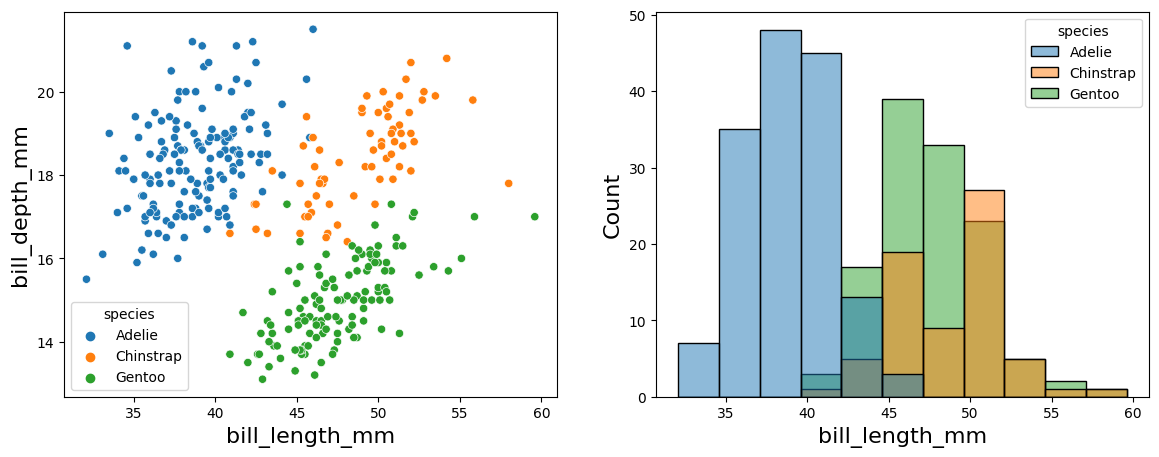

In [109]:
plt.figure(figsize = (14,11))

plt.subplot(2, 2, 1)

sns.scatterplot(
    data,
    x = "bill_length_mm",
    y ="bill_depth_mm",
    hue = "species"
)


plt.subplot(2, 2, 2)

sns.histplot(
    data, 
    x = "bill_length_mm", 
    hue = "species"
)

# Colormap ekleme

In [110]:
grouped_data = data.groupby(["species"])["body_mass_g"].mean()
grouped_data

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [111]:
cmap = plt.get_cmap("viridis")

In [112]:
norm = plt.Normalize(grouped_data.min(), grouped_data.max())

In [113]:
colors = cmap(norm(grouped_data.values))
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.274952, 0.037752, 0.364543, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

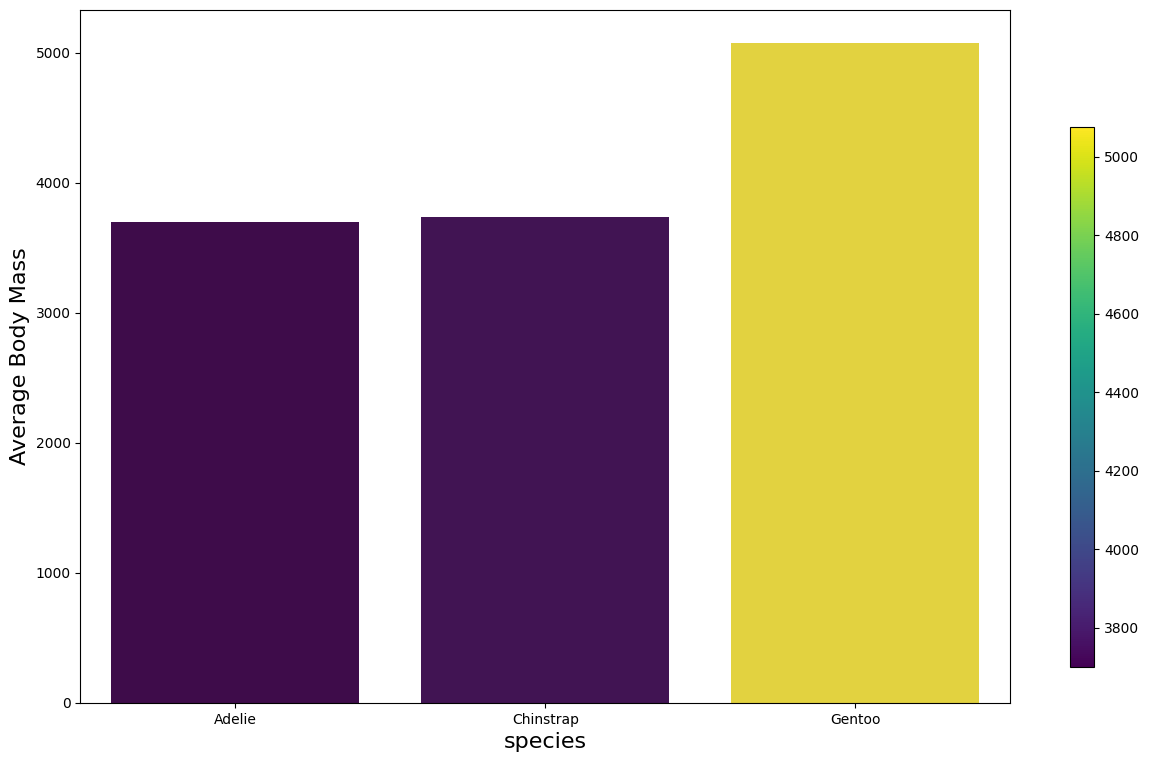

In [114]:
fig, ax = plt.subplots(figsize = (12,9))


sns.barplot(x = grouped_data.index,
            y = grouped_data.values,
            palette = colors)

ax.set_ylabel("Average Body Mass")

cax = fig.add_axes([0.95, 0.15, 0.02, 0.6])
sm = plt.cm.ScalarMappable(norm, cmap)
fig.colorbar(sm, cax)

plt.show()

In [115]:
# Done :)